In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading files

In [4]:
df=pd.read_csv("C:\\Users\\aaron\\Downloads\\jupyter files\\googleplaystore.csv")

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
df.shape

(10841, 13)

In [8]:
df.describe() #gives information about the mean,median,standard deviation,25,50 and 75 percentile

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Task:1 Data clean up – Missing value treatment

# Drop records where rating is missing since rating is our target/study variable

In [9]:
df.Rating.isnull().sum()

1474

In [10]:
df.dropna(subset=["Rating"],axis=0,inplace=True)

In [11]:
df.Rating.isnull().sum()

0

In [12]:
df.shape

(9367, 13)

# Check the null values for the Android Ver column.

In [13]:
# Are all 3 records having the same problem?
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
# Drop the 3rd record i.e. record for “Life Made WIFI …”
df.drop([10472], inplace = True)

In [15]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [16]:
# Replace remaining missing values with the mode
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [17]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

# Task: 2. Data clean up – correcting the data types

In [18]:
df["Price"]=df["Price"].apply((lambda x:str(x).replace("$","")if "$" in str(x) else str(x)))
df["Price"]=df["Price"].apply(lambda x:float(x))
df["Installs"]=df["Installs"].apply((lambda x:str(x).replace("+","")if "+" in str(x) else str(x)))
df["Installs"]=df["Installs"].apply((lambda x:str(x).replace(",","")if "," in str(x) else str(x)))
df["Installs"]=df["Installs"].apply(lambda x:float(x))

In [19]:
df['Reviews']= df['Reviews'].astype('int')

# Task 3. Sanity checks – check for the following and handle accordingly

In [20]:
'''Avg. rating should be between 1 and 5, as only these values are allowed on the play
store'''
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [21]:
'''Reviews should not be more than installs as only those who installed can review the
app.'''
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20M,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19M,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2M,10.0,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [22]:
df.drop(df[df['Reviews']>df['Installs']].index,inplace=True)

In [23]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Task 4. Identify and handle outliers –

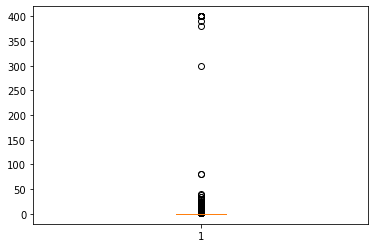

In [24]:
#Make suitable plot to identify outliers in price
plt.boxplot(df['Price'])
plt.show()

In [25]:
#Do you expect apps on the play store to cost $200? Check out these cases
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [26]:
'''After dropping the useless records, make the suitable plot again to identify
outliers'''
df.drop(df[(df['Price']>30)].index,axis=0,inplace=True)

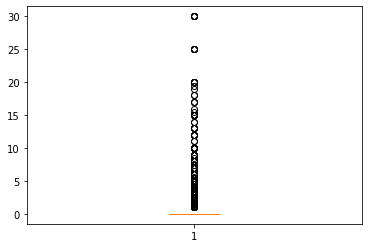

In [27]:
#Limit data to records with price < $30
plt.boxplot(df['Price'])
plt.show()

C:\Users\aaron\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


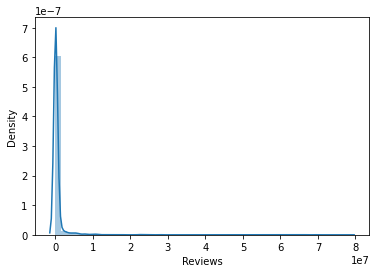

In [28]:
#Make suitable plot
sns.distplot(df['Reviews'])
plt.show()

In [29]:
#Limit data to apps with < 1 Million reviews
less_than_one=df[df['Reviews'] > 1000000 ].index
df.drop(labels=less_than_one,inplace=True)

In [30]:
#What is the 95th percentile of the installs?
percentile = df.Installs.quantile(0.95) 
print(f"The 95th percentile of Installs is {percentile}")

The 95th percentile of Installs is 10000000.0


In [31]:
#Drop records having a value more than the 95th percentile
drop_95= df[df["Installs"] > percentile].index
df.drop(labels=drop_95,inplace = True)

# Data analysis to answer business questions

# Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

C:\Users\aaron\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


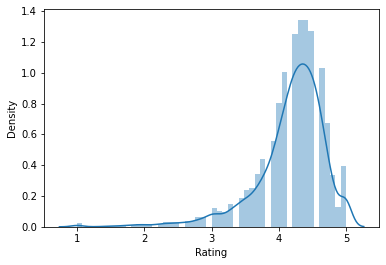

The skewness of this distribution is -1.7434270330647985
The mean is 4.170800237107298
The median is 4.3
The mode is 0    4.3
dtype: float64


In [32]:
sns.distplot(df['Rating'])
plt.show()
sq=df["Rating"].skew()
mode=df.Rating.mode()
median=df.Rating.median()
mean=df.Rating.mean()
print(f"The skewness of this distribution is {sq}\nThe mean is {mean}\nThe median is {median}\nThe mode is {mode}")

# Task 6.What are the top Content Rating values?

In [33]:
#Are there any values with very few records?
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [34]:
#If yes, drop those as they won’t help in the analysis
df.drop(df[df['Content Rating']=="Unrated"].index , inplace=True)
df.drop(df[df['Content Rating']=="Adults only 18+"].index,inplace=True)

In [35]:
df.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver
Content Rating,,,,,,,,,,,,
Everyone,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782,6782
Everyone 10+,332,332,332,332,332,332,332,332,332,332,332,332
Mature 17+,417,417,417,417,417,417,417,417,417,417,417,417
Teen,900,900,900,900,900,900,900,900,900,900,900,900


# Task 7. Effect of size on rating

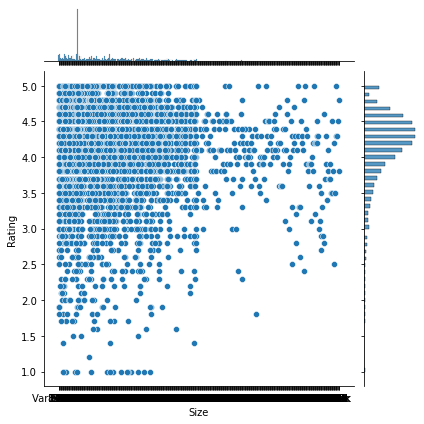

In [36]:
#Make a joinplot to understand the effect of size on rating
sns.jointplot(x ='Size', y='Rating', data = df)
plt.show()

# Task 8. Effect of price on rating

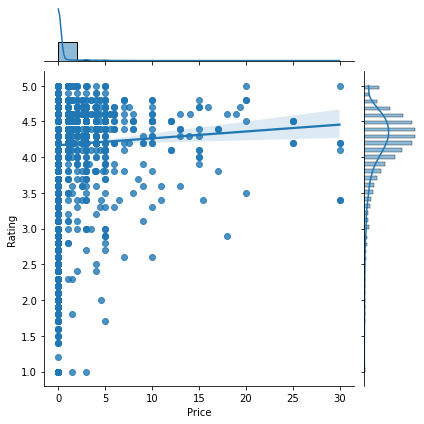

In [37]:
#Make a jointplot (with regression line)
sns.jointplot(x='Price', y='Rating', data=df, kind='reg')
plt.show()

In [38]:
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.158547,0.118414,0.031479
Reviews,0.158547,1.000000,0.736038,-0.073446
Installs,0.118414,0.736038,1.000000,-0.110507
Price,0.031479,-0.073446,-0.110507,1.000000


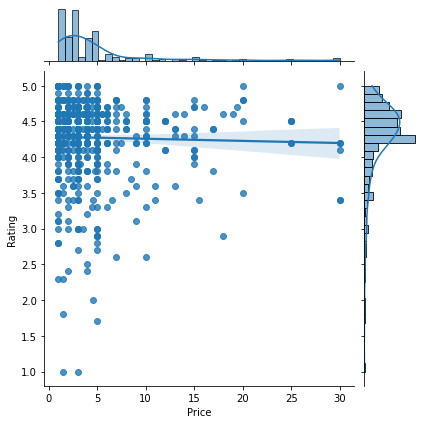

In [39]:
df1=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=df1, kind='reg')
plt.show()

In [40]:
df1.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.095986,0.063960,-0.025975
Reviews,0.095986,1.000000,0.787628,-0.049764
Installs,0.063960,0.787628,1.000000,-0.057710
Price,-0.025975,-0.049764,-0.057710,1.000000


#  Look at all the numeric interactions together 

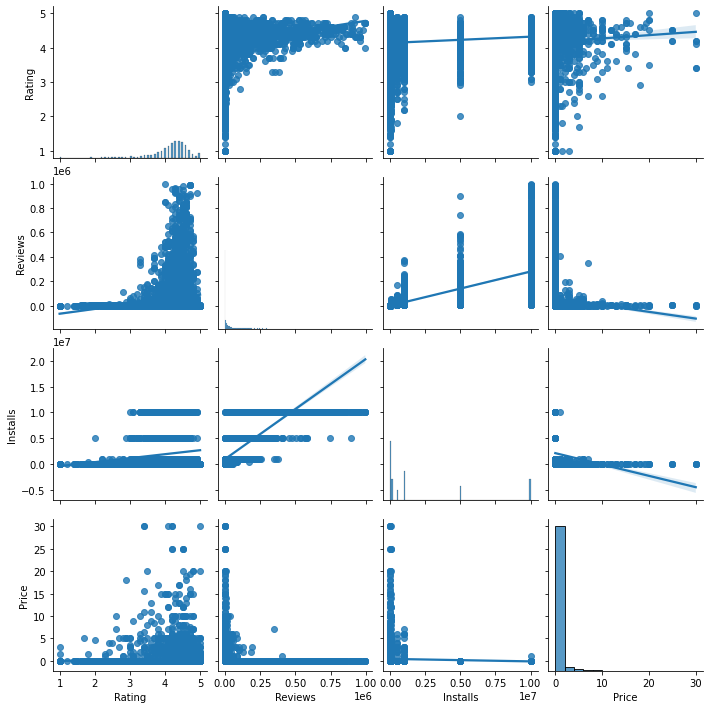

In [41]:
#Make a pairplort with the colulmns
sns.pairplot(df,kind='reg')

# Rating vs. content rating

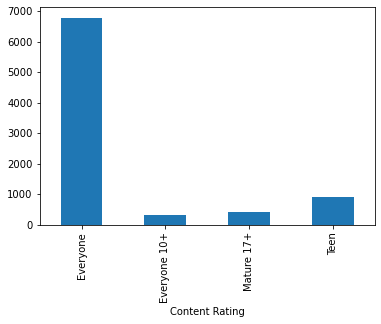

In [42]:
#Make a bar plot displaying the rating for each content rating
df.groupby(['Content Rating'])['Rating'].count().plot.bar()
plt.show()

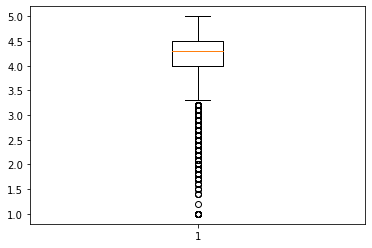

In [43]:
plt.boxplot(df['Rating'])
plt.show()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

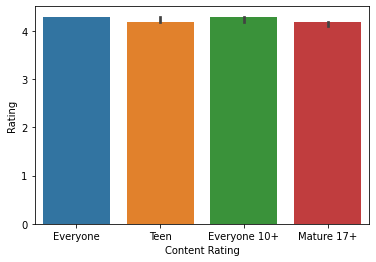

In [44]:
sns.barplot(y='Rating', x='Content Rating', data=df ,estimator=np.median)